In [1]:
! pip install optuna

# INSTALLING **PACKAGES**


!pip install statsmodels



!pip install tabulate

# Standard libraries
import sys  # System-specific parameters and functions
import os   # Miscellaneous operating system interfaces
import warnings  # Warning control
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations

# Visualization
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization
from matplotlib.colors import ListedColormap  # Colormap utilities

# Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler  # Preprocessing tools
from sklearn import model_selection, metrics, preprocessing  # Model selection, evaluation, and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  # Model selection and evaluation
from sklearn.tree import DecisionTreeClassifier  # Decision tree classifier


# Statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Variance inflation factor
from scipy.stats import pointbiserialr, chi2_contingency, spearmanr, entropy  # Statistical functions
from statsmodels.graphics.gofplots import qqplot  # Q-Q plot
from collections import Counter  # Container datatypes

# Tabulate
from tabulate import tabulate  # Pretty-print tabular data

# Set visualization style
#sns.set()  # Set Seaborn default style
#plt.style.use('ggplot')  # Set ggplot style for matplotlib



# LOADING THE DATA SET
#https://drive.google.com/file/d/1Z_KsoIumw-fvivVombIoWuRo0LOe2nCb/view?usp=sharing
#https://drive.google.com/file/d/1aD1PXfwEEZ_F2lQgxuPfj-TVbxQ6NajK/view?usp=sharing
import gdown
import pandas as pd

import pandas as pd

# Updated Google Sheets link setup
sheet_id = "1j_Euo80PrGckVDVr2hTG9zZebxJD0TSC"
sheet_name = "Sheet1"  # Update this if the sheet name is different

# Generate the CSV export link
csv_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

# Read the Google Sheet as CSV
df = pd.read_csv(csv_url)

# Backup original DataFrame
df_backup = df.copy()


# Set Date as the index
df = df.set_index('Date')

# Display the DataFrame (optional in scripts)
df.head()
df_backup=df.copy()

df = df.drop(columns=["YEAR", "MO", "DY"])

df

df=df[["WS10M"]]
df.columns

# Define the number of lag terms
num_lags = 3

# Create lag features for each column in the dataset
lagged_df = df.copy()
for lag in range(1, num_lags + 1):
    lagged_features = df.shift(lag).add_suffix(f'_lag{lag}')
    lagged_df = pd.concat([lagged_df, lagged_features], axis=1)

# Drop rows with NaN values (since initial lags will have missing values)
lagged_df = lagged_df.dropna()



# Display the first few rows
print(lagged_df.head())
lagged_df
# Filter column names starting with 'WS'
filtered_columns = [col for col in df.columns if col.startswith('C')]
filtered_df = df[filtered_columns]
filtered_df.columns
df = lagged_df
df

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.9/246.9 kB 9.3 MB/s eta 0:00:00
                     WS10M  WS10M_lag1  WS10M_lag2  WS10M_lag3
Date                                                          
2013-01-04 00:00:00   5.74        4.75        4.25        3.99
2013-01-05 00:00:00   5.79        5.74        4.75        4.25
2013-01-06 00:00:00   4.52        5.79        5.74        4.75
2013-01-07 00:00:00   4.66        4.52        5.79        5.74
2013-01-08 00:00:00   3.61        4.66        4.52        5.79


,WS10M,WS10M_lag1,WS10M_lag2,WS10M_lag3
Date,,,,
2013-01-04 00:00:00,5.74,4.75,4.25,3.99
2013-01-05 00:00:00,5.79,5.74,4.75,4.25
2013-01-06 00:00:00,4.52,5.79,5.74,4.75
2013-01-07 00:00:00,4.66,4.52,5.79,5.74
2013-01-08 00:00:00,3.61,4.66,4.52,5.79
...,...,...,...,...
2023-12-27 00:00:00,6.43,6.01,4.29,3.64
2023-12-28 00:00:00,3.93,6.43,6.01,4.29
2023-12-29 00:00:00,2.59,3.93,6.43,6.01


## Data Sets

# DF 1

In [2]:

df

,WS10M,WS10M_lag1,WS10M_lag2,WS10M_lag3
Date,,,,
2013-01-04 00:00:00,5.74,4.75,4.25,3.99
2013-01-05 00:00:00,5.79,5.74,4.75,4.25
2013-01-06 00:00:00,4.52,5.79,5.74,4.75
2013-01-07 00:00:00,4.66,4.52,5.79,5.74
2013-01-08 00:00:00,3.61,4.66,4.52,5.79
...,...,...,...,...
2023-12-27 00:00:00,6.43,6.01,4.29,3.64
2023-12-28 00:00:00,3.93,6.43,6.01,4.29
2023-12-29 00:00:00,2.59,3.93,6.43,6.01


In [3]:
df.columns

Index(['WS10M', 'WS10M_lag1', 'WS10M_lag2', 'WS10M_lag3'], dtype='object')

In [4]:
###########################################################################################
# Define the list of variables to select

X = df.drop(columns=['WS10M'])
# Select only those columns from X
 # Features (lagged variables)
y = df['WS10M']  # Target variable (wind speed)


In [5]:
X

,WS10M_lag1,WS10M_lag2,WS10M_lag3
Date,,,
2013-01-04 00:00:00,4.75,4.25,3.99
2013-01-05 00:00:00,5.74,4.75,4.25
2013-01-06 00:00:00,5.79,5.74,4.75
2013-01-07 00:00:00,4.52,5.79,5.74
2013-01-08 00:00:00,4.66,4.52,5.79
...,...,...,...
2023-12-27 00:00:00,6.01,4.29,3.64
2023-12-28 00:00:00,6.43,6.01,4.29
2023-12-29 00:00:00,3.93,6.43,6.01


In [6]:
X.dtypes

,0
WS10M_lag1,float64
WS10M_lag2,float64
WS10M_lag3,float64


In [7]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
import matplotlib.pyplot as plt

# ============================
# Step 1: Load Data
# ============================
# Assume X is a DataFrame with both numerical and already encoded categorical columns
# Assume y is the target variable (time series)

# Split train-test (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]


In [8]:

X.columns

Index(['WS10M_lag1', 'WS10M_lag2', 'WS10M_lag3'], dtype='object')

In [9]:
# Avg_Temp	Max_Temp	Min_Temp	Precipitation	SL_Presure	Relative_Humidity	Surface_Pressure	WS10M		WD_10M_sin	WD_10M_cos


In [10]:
numerical_cols=df.columns
numerical_cols

Index(['WS10M', 'WS10M_lag1', 'WS10M_lag2', 'WS10M_lag3'], dtype='object')

In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Exclude 'WS10M' from scaling
cols_to_scale = [col for col in numerical_cols if col != "WS10M"]

# Store original values before scaling
X_train_before_scaling = X_train[cols_to_scale].copy()

# Apply Min-Max Scaling only to selected columns
scaler = MinMaxScaler()


In [12]:

# ============================
# Step 2: Preprocessing (MinMax Scaling)
# ============================
scaler = MinMaxScaler()

# Scale only numerical columns
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

## Optuna

In [ ]:
print("X_train:")
print(X_train.head())
print("y_train:")
print(y_train.head())
print("X_test:")
print(X_test.head())
print("y_test:")
print(y_test.head())

# Print the shapes of the datasets
print("\nShapes:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train:
                     WS10M_lag1  WS10M_lag2  WS10M_lag3
Date                                                   
2013-01-04 00:00:00    0.439080    0.381609    0.351724
2013-01-05 00:00:00    0.552874    0.439080    0.381609
2013-01-06 00:00:00    0.558621    0.552874    0.439080
2013-01-07 00:00:00    0.412644    0.558621    0.552874
2013-01-08 00:00:00    0.428736    0.412644    0.558621
y_train:
Date
2013-01-04 00:00:00    5.74
2013-01-05 00:00:00    5.79
2013-01-06 00:00:00    4.52
2013-01-07 00:00:00    4.66
2013-01-08 00:00:00    3.61
Name: WS10M, dtype: float64
X_test:
                     WS10M_lag1  WS10M_lag2  WS10M_lag3
Date                                                   
2021-10-20 00:00:00    0.343678    0.597701    0.679310
2021-10-21 00:00:00    0.217241    0.343678    0.597701
2021-10-22 00:00:00    0.213793    0.217241    0.343678
2021-10-23 00:00:00    0.205747    0.213793    0.217241
2021-10-24 00:00:00    0.387356    0.205747    0.213793
y_test:
Date
2021

In [ ]:
! pip install optuna

In [ ]:
import optuna
import random
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit

# Set random seeds for reproducibility
seed = 42
np.random.seed(seed)
random.seed(seed)

# Define the objective function for optimization
def objective(trial):
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf'])
    C = trial.suggest_loguniform('C', 1, 100)             # loguniform from 1 to 100
    epsilon = trial.suggest_uniform('epsilon', 0.01, 0.2) # uniform 0.01 to 0.2
    degree = trial.suggest_int('degree', 2, 5)            # int 2 to 5
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto', 1e-3, 1e-2])
    tscv = TimeSeriesSplit(n_splits=5)

    fold_mse = []

    for train_index, test_index in tscv.split(X_train):
        X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]

        svr_model = SVR(
            kernel=kernel,
            C=C,
            epsilon=epsilon,
            degree=degree,
            gamma=gamma
        )

        svr_model.fit(X_train_cv, y_train_cv)
        y_test_pred_cv = svr_model.predict(X_test_cv)
        test_mse = mean_squared_error(y_test_cv, y_test_pred_cv)
        fold_mse.append(test_mse)

    return np.mean(fold_mse)

# Create Optuna study with fixed seed in sampler
study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=seed))
study.optimize(objective, n_trials=50)

best_params = study.best_params
print(f"Best Parameters: {best_params}")

# Train best model on full training data
best_svr = SVR(**best_params)
best_svr.fit(X_train, y_train)

from sklearn.metrics import r2_score

# Predict and evaluate on train and test sets
y_train_pred_optuna = best_svr.predict(X_train)
y_test_pred_optuna = best_svr.predict(X_test)

train_mse_optuna = mean_squared_error(y_train, y_train_pred_optuna)
test_mse_optuna = mean_squared_error(y_test, y_test_pred_optuna)

train_mae_optuna = mean_absolute_error(y_train, y_train_pred_optuna)
test_mae_optuna = mean_absolute_error(y_test, y_test_pred_optuna)

train_rmse_optuna = np.sqrt(train_mse_optuna)
test_rmse_optuna = np.sqrt(test_mse_optuna)

train_mape_optuna = np.mean(np.abs((y_train - y_train_pred_optuna) / y_train)) * 100
test_mape_optuna = np.mean(np.abs((y_test - y_test_pred_optuna) / y_test)) * 100

train_r2_optuna = r2_score(y_train, y_train_pred_optuna)
test_r2_optuna = r2_score(y_test, y_test_pred_optuna)

print(f"Optuna Train MSE: {train_mse_optuna:.4f}, Optuna Test MSE: {test_mse_optuna:.4f}")
print(f"Optuna Train MAE: {train_mae_optuna:.4f}, Optuna Test MAE: {test_mae_optuna:.4f}")
print(f"Optuna Train RMSE: {train_rmse_optuna:.4f}, Optuna Test RMSE: {test_rmse_optuna:.4f}")
print(f"Optuna Train MAPE: {train_mape_optuna:.4f}%, Optuna Test MAPE: {test_mape_optuna:.4f}%")
print(f"Optuna Train R2: {train_r2_optuna:.4f}, Optuna Test R2: {test_r2_optuna:.4f}")


# Create dataframe of all trials
optuna_results = pd.DataFrame(study.trials_dataframe())

# Select relevant columns
optuna_table_df = optuna_results[[
    'number', 'params_kernel', 'params_C', 'params_epsilon',
    'params_degree', 'params_gamma', 'value'
]]

# Rename columns
optuna_table_df.columns = [
    'Trial', 'kernel', 'C', 'epsilon', 'degree', 'gamma', 'Test MSE'
]

# Plot results table using Plotly
fig_table_optuna = go.Figure(go.Table(
    header=dict(values=optuna_table_df.columns),
    cells=dict(values=[optuna_table_df[col].tolist() for col in optuna_table_df.columns])
))

fig_table_optuna.update_layout(
    title="Optuna Results - Hyperparameter Tuning (SVM)",
    template="plotly_white",
    height=500
)

fig_table_optuna.show()


[I 2025-07-07 04:30:09,141] A new study created in memory with name: no-name-4355358c-0f82-4533-ad39-f7bf62f42b55
[I 2025-07-07 04:30:12,813] Trial 0 finished with value: 0.7785317204656483 and parameters: {'kernel': 'poly', 'C': 15.75132049977973, 'epsilon': 0.039643541684062936, 'degree': 2, 'gamma': 'auto'}. Best is trial 0 with value: 0.7785317204656483.
[I 2025-07-07 04:30:14,677] Trial 1 finished with value: 0.8036417830579163 and parameters: {'kernel': 'poly', 'C': 2.65875439832727, 'epsilon': 0.04454674376934912, 'degree': 2, 'gamma': 'auto'}. Best is trial 0 with value: 0.7785317204656483.
[I 2025-07-07 04:30:16,971] Trial 2 finished with value: 0.6567979445239509 and parameters: {'kernel': 'linear', 'C': 5.404103854647328, 'epsilon': 0.09665329700123683, 'degree': 5, 'gamma': 0.001}. Best is trial 2 with value: 0.6567979445239509.
[I 2025-07-07 04:30:19,909] Trial 3 finished with value: 0.6576580062456199 and parameters: {'kernel': 'linear', 'C': 79.02619549708231, 'epsilon':

Best Parameters: {'kernel': 'rbf', 'C': 8.590943665120607, 'epsilon': 0.02791632909203343, 'degree': 2, 'gamma': 'auto'}
Optuna Train MSE: 0.6212, Optuna Test MSE: 0.7648
Optuna Train MAE: 0.6025, Optuna Test MAE: 0.6698
Optuna Train RMSE: 0.7881, Optuna Test RMSE: 0.8745
Optuna Train MAPE: 17.4224%, Optuna Test MAPE: 18.7910%
Optuna Train R2: 0.7535, Optuna Test R2: 0.6829


In [ ]:
# Store evaluation metrics for the Optuna-tuned model
optuna_train_mse = train_mse_optuna
optuna_test_mse = test_mse_optuna

optuna_train_mae = train_mae_optuna
optuna_test_mae = test_mae_optuna

optuna_train_rmse = train_rmse_optuna
optuna_test_rmse = test_rmse_optuna

optuna_train_mape = train_mape_optuna
optuna_test_mape = test_mape_optuna


In [ ]:
import plotly.graph_objects as go

# Create the time series plot
fig = go.Figure()

# Add actual training data
fig.add_trace(go.Scatter(
    x=y_train.index, y=y_train, mode='lines', name='Actual Train',
    line=dict(color='blue')
))

# Add predicted training data
fig.add_trace(go.Scatter(
    x=y_train.index, y=y_train_pred_optuna, mode='lines', name='Predicted Train',
    line=dict(color='cyan', dash='dash')
))

# Add actual test data
fig.add_trace(go.Scatter(
    x=y_test.index, y=y_test, mode='lines', name='Actual Test',
    line=dict(color='red')
))

# Add predicted test data
fig.add_trace(go.Scatter(
    x=y_test.index, y=y_test_pred_optuna, mode='lines', name='Predicted Test',
    line=dict(color='orange', dash='dash')
))

# Customize the layout
fig.update_layout(
    title="Time Series Plot - Actual vs Predicted",
    xaxis_title="Time",
    yaxis_title="Value",
    template="plotly_white",
    legend=dict(x=0, y=1)
)

# Show the plot
fig.show()


## Original

In [ ]:
print("X_train:")
print(X_train.head())
print("y_train:")
print(y_train.head())
print("X_test:")
print(X_test.head())
print("y_test:")
print(y_test.head())

# Print the shapes of the datasets
print("\nShapes:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train:
                     WS10M_lag1  WS10M_lag2  WS10M_lag3
Date                                                   
2013-01-04 00:00:00    0.439080    0.381609    0.351724
2013-01-05 00:00:00    0.552874    0.439080    0.381609
2013-01-06 00:00:00    0.558621    0.552874    0.439080
2013-01-07 00:00:00    0.412644    0.558621    0.552874
2013-01-08 00:00:00    0.428736    0.412644    0.558621
y_train:
Date
2013-01-04 00:00:00    5.74
2013-01-05 00:00:00    5.79
2013-01-06 00:00:00    4.52
2013-01-07 00:00:00    4.66
2013-01-08 00:00:00    3.61
Name: WS10M, dtype: float64
X_test:
                     WS10M_lag1  WS10M_lag2  WS10M_lag3
Date                                                   
2021-10-20 00:00:00    0.343678    0.597701    0.679310
2021-10-21 00:00:00    0.217241    0.343678    0.597701
2021-10-22 00:00:00    0.213793    0.217241    0.343678
2021-10-23 00:00:00    0.205747    0.213793    0.217241
2021-10-24 00:00:00    0.387356    0.205747    0.213793
y_test:
Date
2021

Cross-Validation MAE (Mean): 0.6142

Train Metrics:
MSE: 0.6260
RMSE: 0.7912
MAE: 0.6056
MAPE: 17.5945%
R² Score: 0.7516

Test Metrics:
MSE: 0.7586
RMSE: 0.8710
MAE: 0.6680
MAPE: 18.8642%
R² Score: 0.6854


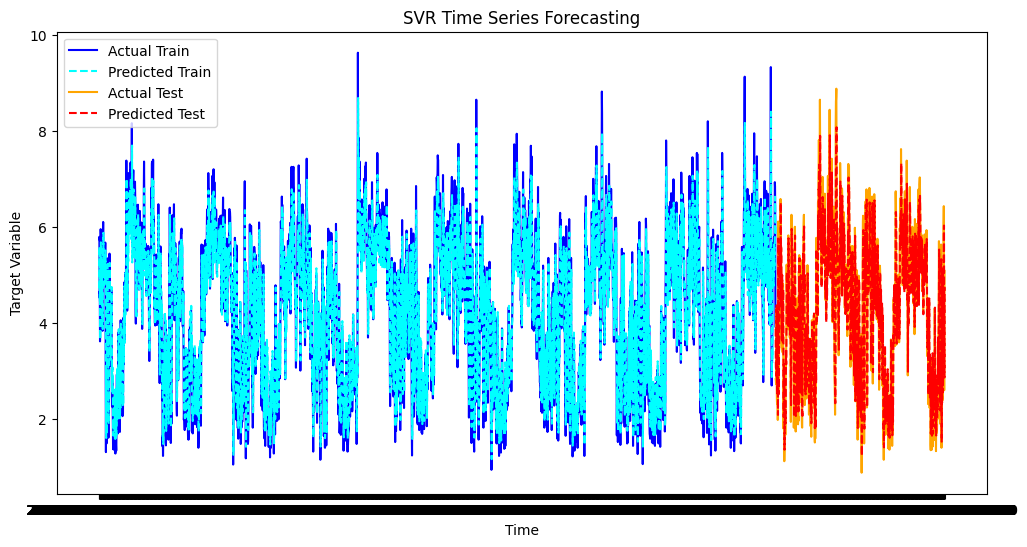

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import random

# Set random seeds for reproducibility
seed = 42
np.random.seed(seed)
random.seed(seed)

# ============================
# Assuming X_train, X_test, y_train, y_test are already defined and preprocessed
# ============================

# Step 2: Define Time Series Split
tscv = TimeSeriesSplit(n_splits=10)

# Step 3: Define SVR Model
svr_model = SVR(kernel='rbf', C=500, gamma=1/(2*(5**2)))  # gamma = 1/(2*p^2)

# Perform Time Series Cross-Validation
cv_scores = []
for train_idx, val_idx in tscv.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Train SVR model on the fold
    svr_model.fit(X_train_fold, y_train_fold)

    # Predict on validation fold
    y_val_pred = svr_model.predict(X_val_fold)

    # Compute MAE for the fold
    mae = mean_absolute_error(y_val_fold, y_val_pred)
    cv_scores.append(mae)

# Print Cross-Validation MAE Scores
print(f"Cross-Validation MAE (Mean): {np.mean(cv_scores):.4f}")

# Step 4: Train Model on Full Training Set & Predict
svr_model.fit(X_train, y_train)

# Predictions
y_train_pred = svr_model.predict(X_train)
y_test_pred = svr_model.predict(X_test)

# Step 5: Calculate Metrics
def calculate_metrics(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
    r2 = r2_score(y_true, y_pred)  # R-squared

    print(f"\n{dataset_name} Metrics:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MAPE: {mape:.4f}%")
    print(f"R² Score: {r2:.4f}")

    return mse, rmse, mae, mape, r2

# Compute and print for train and test sets
calculate_metrics(y_train, y_train_pred, "Train")
calculate_metrics(y_test, y_test_pred, "Test")

# Step 6: Plot Predictions
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train, label='Actual Train', color='blue')
plt.plot(y_train.index, y_train_pred, label='Predicted Train', linestyle='dashed', color='cyan')
plt.plot(y_test.index, y_test, label='Actual Test', color='orange')
plt.plot(y_test.index, y_test_pred, label='Predicted Test', linestyle='dashed', color='red')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Target Variable")
plt.title("SVR Time Series Forecasting")
plt.show()


In [ ]:
# Store Train Metrics
ORIGINAL_TRAIN_MSE, ORIGINAL_TRAIN_RMSE, ORIGINAL_TRAIN_MAE, ORIGINAL_TRAIN_MAPE, ORIGINAL_TRAIN_R2= calculate_metrics(y_train, y_train_pred, "Train")

# Store Test Metrics
ORIGINAL_TEST_MSE, ORIGINAL_TEST_RMSE, ORIGINAL_TEST_MAE, ORIGINAL_TEST_MAPE, ORIGINAL_TEST_R2= calculate_metrics(y_test, y_test_pred, "Test")
ORIGINAL_TEST_MSE, ORIGINAL_TEST_RMSE, ORIGINAL_TEST_MAE, ORIGINAL_TEST_MAPE, ORIGINAL_TEST_R2


Train Metrics:
MSE: 0.6260
RMSE: 0.7912
MAE: 0.6056
MAPE: 17.5945%
R² Score: 0.7516

Test Metrics:
MSE: 0.7586
RMSE: 0.8710
MAE: 0.6680
MAPE: 18.8642%
R² Score: 0.6854


(0.758605288128041,
 np.float64(0.8709794992581863),
 0.6679507443840023,
 np.float64(18.864239337897676),
 0.6854144210725029)

## Grid

In [13]:
print("X_train:")
print(X_train.head())
print("y_train:")
print(y_train.head())
print("X_test:")
print(X_test.head())
print("y_test:")
print(y_test.head())

# Print the shapes of the datasets
print("\nShapes:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train:
                     WS10M_lag1  WS10M_lag2  WS10M_lag3
Date                                                   
2013-01-04 00:00:00    0.439080    0.381609    0.351724
2013-01-05 00:00:00    0.552874    0.439080    0.381609
2013-01-06 00:00:00    0.558621    0.552874    0.439080
2013-01-07 00:00:00    0.412644    0.558621    0.552874
2013-01-08 00:00:00    0.428736    0.412644    0.558621
y_train:
Date
2013-01-04 00:00:00    5.74
2013-01-05 00:00:00    5.79
2013-01-06 00:00:00    4.52
2013-01-07 00:00:00    4.66
2013-01-08 00:00:00    3.61
Name: WS10M, dtype: float64
X_test:
                     WS10M_lag1  WS10M_lag2  WS10M_lag3
Date                                                   
2021-10-20 00:00:00    0.343678    0.597701    0.679310
2021-10-21 00:00:00    0.217241    0.343678    0.597701
2021-10-22 00:00:00    0.213793    0.217241    0.343678
2021-10-23 00:00:00    0.205747    0.213793    0.217241
2021-10-24 00:00:00    0.387356    0.205747    0.213793
y_test:
Date
2021

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'C': 10, 'degree': 2, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}

Train Metrics for Best (linear):
R² Score: 0.7506
RMSE: 0.7927
MAE: 0.6070
MAPE: 17.64%
MSE: 0.6284

Test Metrics for Best (linear):
R² Score: 0.6858
RMSE: 0.8705
MAE: 0.6676
MAPE: 18.84%
MSE: 0.7577


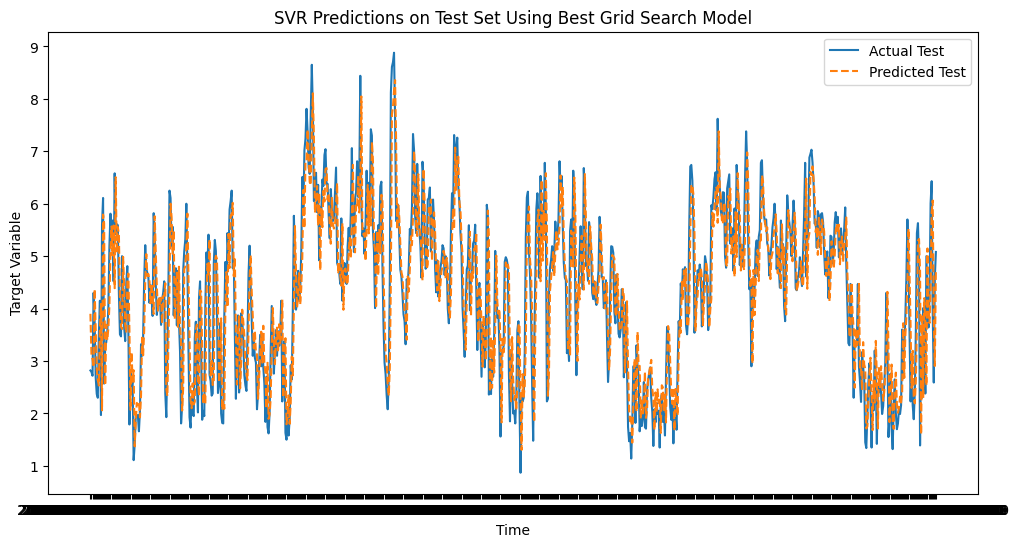

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import random

# Set random seeds for reproducibility
seed = 42
np.random.seed(seed)
random.seed(seed)

# ============================
# Assuming X_train, X_test, y_train, y_test are already defined
# ============================

# Define TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Define parameter grid for SVR hyperparameter tuning
param_grid = {

    'kernel': ['linear', 'poly'],              # Kernel types
    'C': [1, 10,100],                            # Regularization parameter (1 to 100)
    'epsilon': [0.01, 0.1],                      # Epsilon range 0.01 to 0.2
    'degree': [2, 3],                           # Degree for poly kernel (2 to 5)
    'gamma': ['scale', 'auto']            # Kernel coefficient

}

# Initialize SVR model
svr = SVR()

# Run GridSearchCV with time series cross-validation and parallel processing
grid_search = GridSearchCV(
    estimator=svr,
    param_grid=param_grid,
    cv=tscv,
    scoring='neg_mean_absolute_error',  # Minimize MAE
    n_jobs=-1,
    verbose=2
)

# Fit grid search on training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print(f"Best Parameters: {grid_search.best_params_}")

# Get the best SVR model from grid search
best_svr_model = grid_search.best_estimator_

# Make predictions on train and test sets
y_train_pred_best = best_svr_model.predict(X_train)
y_test_pred_best = best_svr_model.predict(X_test)

# Function to calculate and print performance metrics
def calculate_metrics(y_true, y_pred, dataset_name, kernel_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    print(f"\n{dataset_name} Metrics for {kernel_name}:")
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"MSE: {mse:.4f}")            # Added MSE print
# Calculate and print metrics for train and test datasets
calculate_metrics(y_train, y_train_pred_best, "Train", f"Best ({grid_search.best_params_['kernel']})")
calculate_metrics(y_test, y_test_pred_best, "Test", f"Best ({grid_search.best_params_['kernel']})")

# ============================
# Plot actual vs predicted for test set
# ============================
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Test')
plt.plot(y_test.index, y_test_pred_best, label='Predicted Test', linestyle='dashed')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Target Variable")
plt.title("SVR Predictions on Test Set Using Best Grid Search Model")
plt.show()


In [ ]:
#============================
# Step 7: 15][Plot Predictions
# ============================
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Test', color='orangi[]'i[]
plt.plot(y_test.index, y_test_pred_best, label=f'Predicted Test ({grid_search.best_params_["kernel"]})', linestyle='dashed', color='red')

plt.legend()
plt.xlabel("Time")
plt.ylabel("Target Variable")
plt.title("SVR Kernel Comparison: Best Grid Search vs. Fourier Kernel")
plt.show()

In [ ]:
def calculate_metrics(y_true, y_pred, dataset_name, kernel_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    # Print metrics for the specified dataset and kernel
    print(f"\n{dataset_name} Metrics for {kernel_name}:")
    print(f"R² Score: {r2:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.2f}%")

    # Return metrics to store them later
    return mse, rmse, mae, mape, r2
# Store Train Metrics for Best Model
GRID_TRAIN_MSE, GRID_TRAIN_RMSE, GRID_TRAIN_MAE, GRID_TRAIN_MAPE, GRID_TRAIN_R2 = calculate_metrics(y_train, y_train_pred_best, "Train", f"Best ({grid_search.best_params_['kernel']})")

# Store Test Metrics for Best Model
GRID_TEST_MSE, GRID_TEST_RMSE, GRID_TEST_MAE, GRID_TEST_MAPE, GRID_TEST_R2 = calculate_metrics(y_test, y_test_pred_best, "Test", f"Best ({grid_search.best_params_['kernel']})")


## Random Search

In [ ]:
print("X_train:")
print(X_train.head())
print("y_train:")
print(y_train.head())
print("X_test:")
print(X_test.head())
print("y_test:")
print(y_test.head())

# Print the shapes of the datasets
print("\nShapes:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train:
                     WS10M_lag1  WS10M_lag2  WS10M_lag3
Date                                                   
2013-01-04 00:00:00    0.439080    0.381609    0.351724
2013-01-05 00:00:00    0.552874    0.439080    0.381609
2013-01-06 00:00:00    0.558621    0.552874    0.439080
2013-01-07 00:00:00    0.412644    0.558621    0.552874
2013-01-08 00:00:00    0.428736    0.412644    0.558621
y_train:
Date
2013-01-04 00:00:00    5.74
2013-01-05 00:00:00    5.79
2013-01-06 00:00:00    4.52
2013-01-07 00:00:00    4.66
2013-01-08 00:00:00    3.61
Name: WS10M, dtype: float64
X_test:
                     WS10M_lag1  WS10M_lag2  WS10M_lag3
Date                                                   
2021-10-20 00:00:00    0.343678    0.597701    0.679310
2021-10-21 00:00:00    0.217241    0.343678    0.597701
2021-10-22 00:00:00    0.213793    0.217241    0.343678
2021-10-23 00:00:00    0.205747    0.213793    0.217241
2021-10-24 00:00:00    0.387356    0.205747    0.213793
y_test:
Date
2021

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Parameters (Linear, Polynomial, RBF): {'C': np.float64(9.449399034383031), 'degree': 2, 'epsilon': np.float64(0.04693220645902588), 'gamma': 'auto', 'kernel': 'rbf'}

Train Metrics for Best (rbf):
MSE: 0.6212, R² Score: 0.7535, RMSE: 0.7881, MAE: 0.6025, MAPE: 17.41%

Test Metrics for Best (rbf):
MSE: 0.7658, R² Score: 0.6824, RMSE: 0.8751, MAE: 0.6703, MAPE: 18.79%


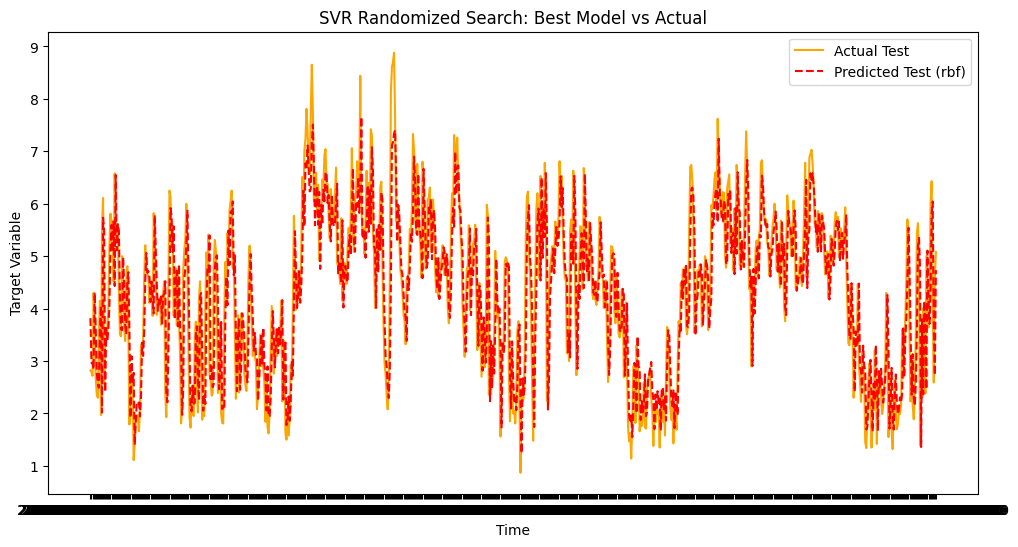

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import uniform, randint
import random

# Set random seeds for reproducibility
seed = 42
np.random.seed(seed)
random.seed(seed)

# ============================
# Assuming X_train, X_test, y_train, y_test are already defined
# ============================

# Step 1: Define Time Series Split
tscv = TimeSeriesSplit(n_splits=10)

# Step 2: Define Parameter Distribution for Randomized Search
# Note: gamma cannot mix strings and distributions in param grid; separate out or remove strings
param_dist = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': uniform(loc=1, scale=99),                   # Continuous uniform 1 to 100
    'epsilon': uniform(loc=0.01, scale=0.19),       # Continuous uniform 0.01 to 0.2
    'degree': randint(2, 6),                         # Integers 2 to 5 inclusive
    'gamma': ['scale', 'auto', 1e-3, 1e-2]
}

# Step 3: Perform Randomized Search with Random State for reproducibility
svr = SVR()
random_search = RandomizedSearchCV(
    estimator=svr,
    param_distributions=param_dist,
    n_iter=100,
    cv=tscv,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2,
    random_state=seed
)
random_search.fit(X_train, y_train)

# Print best parameters found
print(f"Best Parameters (Linear, Polynomial, RBF): {random_search.best_params_}")

# Step 4: Train & Evaluate Best Model
best_svr = random_search.best_estimator_

# Predictions for the best SVR model
y_train_pred_best = best_svr.predict(X_train)
y_test_pred_best = best_svr.predict(X_test)
# Step 5: Calculate Metrics Function
def calculate_metrics(y_true, y_pred, dataset_name, kernel_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    print(f"\n{dataset_name} Metrics for {kernel_name}:")
    print(f"MSE: {mse:.4f}, R² Score: {r2:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.2f}%")


# Evaluate performance on train and test datasets
calculate_metrics(y_train, y_train_pred_best, "Train", f"Best ({random_search.best_params_['kernel']})")
calculate_metrics(y_test, y_test_pred_best, "Test", f"Best ({random_search.best_params_['kernel']})")

# Step 6: Plot Predictions on Test Data
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Test', color='orange')
plt.plot(y_test.index, y_test_pred_best, label=f'Predicted Test ({random_search.best_params_["kernel"]})', linestyle='dashed', color='red')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Target Variable")
plt.title("SVR Randomized Search: Best Model vs Actual")
plt.show()


In [ ]:

# Store Train Metrics for Best Model from Randomized Search
RANDOM_TRAIN_MSE, RANDOM_TRAIN_RMSE, RANDOM_TRAIN_MAE, RANDOM_TRAIN_MAPE, RANDOM_TRAIN_R2 = mean_squared_error(y_train, y_train_pred_best), np.sqrt(mean_squared_error(y_train, y_train_pred_best)), mean_absolute_error(y_train, y_train_pred_best), np.mean(np.abs((y_train - y_train_pred_best) / y_train)) * 100, r2_score(y_train, y_train_pred_best)

# Store Test Metrics for Best Model from Randomized Search
RANDOM_TEST_MSE, RANDOM_TEST_RMSE, RANDOM_TEST_MAE, RANDOM_TEST_MAPE, RANDOM_TEST_R2 = mean_squared_error(y_test, y_test_pred_best), np.sqrt(mean_squared_error(y_test, y_test_pred_best)), mean_absolute_error(y_test, y_test_pred_best), np.mean(np.abs((y_test - y_test_pred_best) / y_test)) * 100, r2_score(y_test, y_test_pred_best)

# Print the stored values
print(f"RANDOM_TRAIN_MSE: {RANDOM_TRAIN_MSE:.4f}, RANDOM_TRAIN_RMSE: {RANDOM_TRAIN_RMSE:.4f}, RANDOM_TRAIN_MAE: {RANDOM_TRAIN_MAE:.4f}, RANDOM_TRAIN_MAPE: {RANDOM_TRAIN_MAPE:.2f}%, RANDOM_TRAIN_R2: {RANDOM_TRAIN_R2:.4f}")
print(f"RANDOM_TEST_MSE: {RANDOM_TEST_MSE:.4f}, RANDOM_TEST_RMSE: {RANDOM_TEST_RMSE:.4f}, RANDOM_TEST_MAE: {RANDOM_TEST_MAE:.4f}, RANDOM_TEST_MAPE: {RANDOM_TEST_MAPE:.2f}%, RANDOM_TEST_R2: {RANDOM_TEST_R2:.4f}")


RANDOM_TRAIN_MSE: 0.6212, RANDOM_TRAIN_RMSE: 0.7881, RANDOM_TRAIN_MAE: 0.6025, RANDOM_TRAIN_MAPE: 17.41%, RANDOM_TRAIN_R2: 0.7535
RANDOM_TEST_MSE: 0.7658, RANDOM_TEST_RMSE: 0.8751, RANDOM_TEST_MAE: 0.6703, RANDOM_TEST_MAPE: 18.79%, RANDOM_TEST_R2: 0.6824


In [ ]:
import pandas as pd

# Create a DataFrame to store the evaluation metrics
metrics_df = pd.DataFrame({
    "Method": ["Original Model", "Grid Search", "Randomized Search", "Optuna"],
    "Train MSE": [ORIGINAL_TRAIN_MSE, GRID_TRAIN_MSE, RANDOM_TRAIN_MSE, optuna_train_mse],
    "Test MSE": [ORIGINAL_TEST_MSE, GRID_TEST_MSE, RANDOM_TEST_MSE, optuna_test_mse],
    "Train RMSE": [ORIGINAL_TRAIN_RMSE, GRID_TRAIN_RMSE, RANDOM_TRAIN_RMSE, optuna_train_rmse],
    "Test RMSE": [ORIGINAL_TEST_RMSE, GRID_TEST_RMSE, RANDOM_TEST_RMSE, optuna_test_rmse],
    "Train MAE": [ORIGINAL_TRAIN_MAE, GRID_TRAIN_MAE, RANDOM_TRAIN_MAE, optuna_train_mae],
    "Test MAE": [ORIGINAL_TEST_MAE, GRID_TEST_MAE, RANDOM_TEST_MAE, optuna_test_mae],
    "Train MAPE": [ORIGINAL_TRAIN_MAPE, GRID_TRAIN_MAPE, RANDOM_TRAIN_MAPE, optuna_train_mape],
    "Test MAPE": [ORIGINAL_TEST_MAPE, GRID_TEST_MAPE, RANDOM_TEST_MAPE, optuna_test_mape]
})

# Display the table
print(metrics_df)


NameError: name 'ORIGINAL_TRAIN_MSE' is not defined

In [ ]:
# Save the metrics DataFrame to a CSV file
metrics_df.to_csv("variableSet_1_SVR.csv", index=False)

print("Metrics saved to model_evaluation_metrics.csv")
